In [1]:
import pandas as pd
df18= pd.read_pickle('df18featuesy.p')


In [2]:
features = df18.columns

In [5]:
features = features.drop('price')

In [8]:
import tensorflow as tf

from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

D:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [15]:
from sklearn.model_selection import train_test_split, KFold

dataX = df18[features].values
dataY = df18[['price']].values

X_train, X_test, y_train, y_test = train_test_split(dataX, dataY)

# y_train = y_train.reshape(-1,1)
# y_test = y_test.reshape(-1,1)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)


tf.reset_default_graph()

X = tf.placeholder(dtype=tf.float32, 
                   shape=(None,X_train.shape[1]),
                   name='X')
y = tf.placeholder(dtype=tf.float32,
                   shape=(None),
                   name='y')
n_hidden = 100
hidden1 = tf.layers.dense(X, units=n_hidden,
                          name='hidden1',
                          activation=tf.nn.relu)
y_hat = tf.layers.dense(hidden1, units=1,
                        name='y_hat',
                        activation=tf.nn.sigmoid)

loss = tf.losses.log_loss(y, y_hat)

optimizer = tf.train.AdamOptimizer(0.001)

training_op = optimizer.minimize(loss)


init = tf.global_variables_initializer()

test_err = []
train_err = []

with tf.Session() as sess:
    init.run()
    
    for epoch in range(2000):
        sess.run(training_op, 
                 feed_dict={X:X_train, y:y_train})
        train_loss = sess.run(loss, feed_dict={X:X_train, y:y_train})
        test_loss = sess.run(loss, feed_dict={X:X_test, y:y_test})
        test_err.append(test_loss)
        train_err.append(train_loss)
        if epoch % 100 == 0:
            print('epoch', epoch+1, train_loss, test_loss)
        
    pred = sess.run(y_hat, feed_dict={X:X_test})
    
metrics.r2_score(y_test, pred)

epoch 1 0.8470708 0.8378967
epoch 101 -0.08079441 -0.083593935
epoch 201 -0.21692261 -0.22133781
epoch 301 -0.23605873 -0.23890565
epoch 401 -0.24457967 -0.24491407
epoch 501 -0.25064972 -0.24861266
epoch 601 -0.25512257 -0.25192797
epoch 701 -0.25856107 -0.25476465
epoch 801 -0.2614203 -0.25707772
epoch 901 -0.26388013 -0.2590063
epoch 1001 -0.2660334 -0.26065117
epoch 1101 -0.26793057 -0.26197815
epoch 1201 -0.2697305 -0.26311833
epoch 1301 -0.27146465 -0.26403746
epoch 1401 -0.27312994 -0.26475894
epoch 1501 -0.27472052 -0.2652981
epoch 1601 -0.27623275 -0.26578468
epoch 1701 -0.2777004 -0.26611358
epoch 1801 -0.27913645 -0.26633906
epoch 1901 -0.280562 -0.2665419


-0.2050419276641171

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(dataX, dataY)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

X_train.shape

(6567, 79)

In [17]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [18]:
model = Sequential()

input_units = X_train.shape[1]
hidden_units = input_units

model.add(Dense(hidden_units, input_dim=input_units, activation='relu'))
model.add(Dense(1))

In [19]:
from keras.optimizers import Adam

#model.compile(loss='mean_squared_error', optimizer='adam')

adam = Adam(lr=0.01)
model.compile(loss='mean_squared_error', optimizer=adam)

In [20]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), 
          epochs=10, batch_size=None)

Train on 6567 samples, validate on 2190 samples
Epoch 1/10
6567/6567 [==============================] - 1s 106us/step - loss: 0.0863 - val_loss: 0.0149
Epoch 2/10
6567/6567 [==============================] - 0s 56us/step - loss: 0.0057 - val_loss: 0.0040
Epoch 3/10
6567/6567 [==============================] - 0s 64us/step - loss: 0.0036 - val_loss: 0.0037
Epoch 4/10
6567/6567 [==============================] - 0s 60us/step - loss: 0.0035 - val_loss: 0.0035
Epoch 5/10
6567/6567 [==============================] - 0s 49us/step - loss: 0.0036 - val_loss: 0.0039
Epoch 6/10
6567/6567 [==============================] - 0s 48us/step - loss: 0.0036 - val_loss: 0.0036
Epoch 7/10
6567/6567 [==============================] - 0s 47us/step - loss: 0.0036 - val_loss: 0.0038
Epoch 8/10
6567/6567 [==============================] - 0s 45us/step - loss: 0.0039 - val_loss: 0.0035
Epoch 9/10
6567/6567 [==============================] - 0s 53us/step - loss: 0.0040 - val_loss: 0.0039
Epoch 10/10
6567/6567 [=

In [21]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                    epochs=100, batch_size=None, verbose=0)

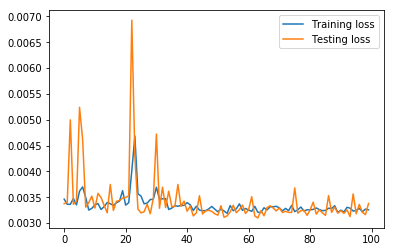

In [22]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']
plt.plot(train_loss, label='Training loss')
plt.plot(test_loss, label='Testing loss')
plt.legend()

In [23]:
pd.DataFrame(history.history)

,loss,val_loss
0,0.003463,0.003376
1,0.003364,0.003404
2,0.003363,0.004998
3,0.003477,0.003365
4,0.003351,0.003427
5,0.003618,0.005241
6,0.003701,0.004620
7,0.003497,0.003308
8,0.003252,0.003397
9,0.003286,0.003521


In [24]:
def basic_model_2(x_size, y_size):
    t_model = Sequential()
    t_model.add(Dense(100, activation="tanh", input_shape=(x_size,)))
    t_model.add(Dropout(0.1))
    t_model.add(Dense(50, activation="relu"))
    t_model.add(Dense(20, activation="relu"))
    t_model.add(Dense(y_size))
    print(t_model.summary())
    t_model.compile(loss='mean_squared_error',
        optimizer=Adam(),
        metrics=[metrics.mae])
    return(t_model)

In [25]:
def basic_model_1(x_size, y_size):
    t_model = Sequential()
    t_model.add(Dense(100, activation="tanh", input_shape=(x_size,)))
    t_model.add(Dense(50, activation="relu"))
    t_model.add(Dense(y_size))
    print(t_model.summary())
    t_model.compile(loss='mean_squared_error',
        optimizer=Adam(),
        metrics=[metrics.mae])
    return(t_model)

In [26]:
def basic_model_3(x_size, y_size):
    t_model = Sequential()
    t_model.add(Dense(80, activation="tanh", kernel_initializer='normal', input_shape=(x_size,)))
    t_model.add(Dropout(0.2))
    t_model.add(Dense(120, activation="relu", kernel_initializer='normal', 
        kernel_regularizer=regularizers.l1(0.01), bias_regularizer=regularizers.l1(0.01)))
    t_model.add(Dropout(0.1))
    t_model.add(Dense(20, activation="relu", kernel_initializer='normal', 
        kernel_regularizer=regularizers.l1_l2(0.01), bias_regularizer=regularizers.l1_l2(0.01)))
    t_model.add(Dropout(0.1))
    t_model.add(Dense(10, activation="relu", kernel_initializer='normal'))
    t_model.add(Dropout(0.0))
    t_model.add(Dense(y_size))
    t_model.compile(
        loss='mean_squared_error',
        optimizer='nadam',
        metrics=[metrics.mae])
    return(t_model)

In [28]:
import keras
from keras import metrics
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam, RMSprop
from keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint
from keras.utils import plot_model
from keras.models import load_model

In [77]:
model = basic_model_2(X_test.shape[1], y_test.shape[1])


model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 100)               8000      
_________________________________________________________________
dropout_6 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_20 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 21        
Total params: 14,091
Trainable params: 14,091
Non-trainable params: 0
_________________________________________________________________
None
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
d

In [100]:
epochs = 50
batch_size = 5

print('Epochs: ', epochs)
print('Batch size: ', batch_size)

Epochs:  50
Batch size:  5


In [101]:
keras_callbacks = [
    # ModelCheckpoint('/tmp/keras_checkpoints/model.{epoch:02d}-{val_loss:.2f}.hdf5', monitor='val_loss', save_best_only=True, verbose=2)
    # ModelCheckpoint('/tmp/keras_checkpoints/model.{epoch:02d}.hdf5', monitor='val_loss', save_best_only=True, verbose=0)
    # TensorBoard(log_dir='/tmp/keras_logs/model_3', histogram_freq=0, write_graph=True, write_images=True, embeddings_freq=0, embeddings_layer_names=None, embeddings_metadata=None),
    EarlyStopping(monitor='val_mean_absolute_error', patience=20, verbose=0)
]

In [102]:
model.fit(X_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    shuffle=True,
    verbose=0, # Change it to 2, if wished to observe execution
    validation_data=( X_test, y_test),
    callbacks=keras_callbacks)

In [103]:
train_score = model.evaluate(X_train, y_train, verbose=0)
valid_score = model.evaluate( X_test, y_test, verbose=0)

print('Train MAE: ', round(train_score[1], 4), ', Train Loss: ', round(train_score[0], 4)) 
print('Val MAE: ', round(valid_score[1], 4), ', Val Loss: ', round(valid_score[0], 4))

Train MAE:  0.0262 , Train Loss:  0.0012
Val MAE:  0.048 , Val Loss:  0.0041


In [104]:
def plot_hist(h, xsize=6, ysize=10):
    # Prepare plotting
    fig_size = plt.rcParams["figure.figsize"]
    plt.rcParams["figure.figsize"] = [xsize, ysize]
    fig, axes = plt.subplots(nrows=4, ncols=4, sharex=True)
    
    # summarize history for MAE
    plt.subplot(211)
    plt.plot(h['mean_absolute_error'])
    plt.plot(h['val_mean_absolute_error'])
    plt.title('Training vs Validation MAE')
    plt.ylabel('MAE')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    
    # summarize history for loss
    plt.subplot(212)
    plt.plot(h['loss'])
    plt.plot(h['val_loss'])
    plt.title('Training vs Validation Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    
    # Plot it all in IPython (non-interactive)
    plt.draw()
    plt.show()

    return


In [105]:
history = model.fit(X_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    shuffle=True,
    verbose=0, # Change it to 2, if wished to observe execution
    validation_data=( X_test, y_test),
    callbacks=keras_callbacks)

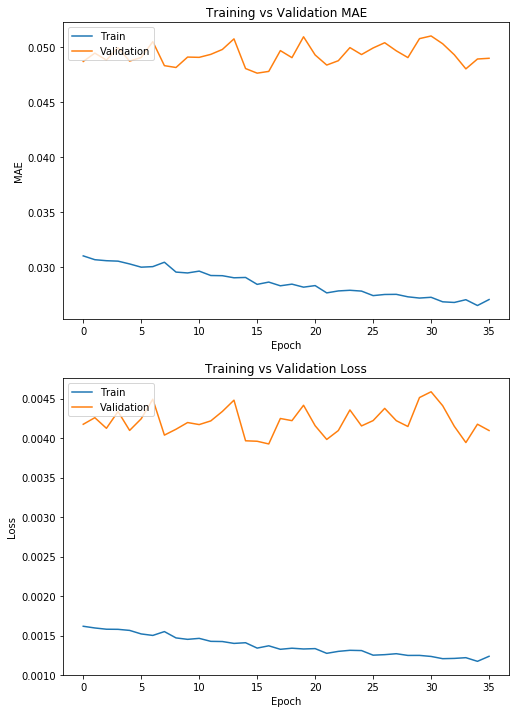

In [106]:
plot_hist(history.history, xsize=8, ysize=12)


In [107]:
y_pred= model.predict(X_test)
y_pred

array([[ 0.01412735],
       [ 0.06429595],
       [-0.05565004],
       ...,
       [ 0.01019376],
       [ 0.01990529],
       [-0.07570001]], dtype=float32)

In [108]:
from sklearn.metrics import r2_score

In [109]:
y_true = y_test

In [110]:
r2_score(y_true, y_pred)

0.049723484119909456